# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin, Ethereum, Arweave, and Gnosis Daily Price Analyses – 22 August Roundup.  The global crypto market has seen a speedy recovery in value. The recent changes in the market brought speedy gains as the influx of capital increased. The performance of Bitcoin, Ethereum, and others shows significant encouragement. Their value increased at a tremendous pace. Though the market has suffered considerably, there have been few bullish rallies &#8230;  Bitcoin, Ethereum, Arweave, and Gnosis Daily Price Analyses – 22 August Roundup Read More &#187; ... [| Skaityti daugiau](https://www.cryptopolitan.com/bitcoin-ethereum-arweave-and-gnosis-daily-price-analyses-22-august-roundup/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- PM signs off on lifting pandemic border measures, sources say | CBC News.  The federal government has decided to drop the vaccination requirement for people entering Canada, end random COVID-19 testing at airports and make the use of the ArriveCan app optional by the end of this month, a senior government source told CBC News. ... [| Skaityti daugiau](http://www.cbc.ca/news/politics/government-lifting-pandemic-border-measures-1.6591883) 

### Kainų kaita pandemijos metu

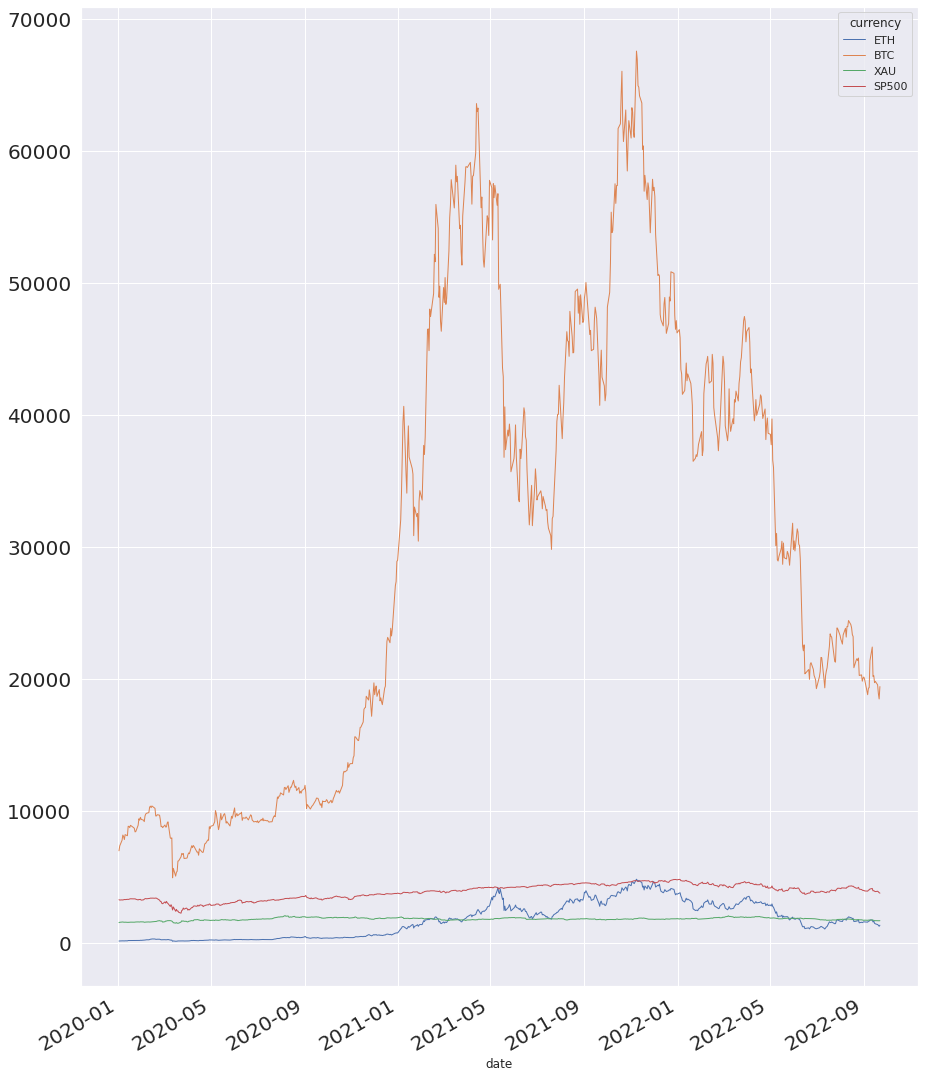

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.898477,0.249696,0.914314
BTC,0.898477,1.000000,0.215956,0.844057
XAU,0.249696,0.215956,1.000000,0.357163
SP500,0.914314,0.844057,0.357163,1.000000


In [8]:
#hide ### Koreliacijos matrica.

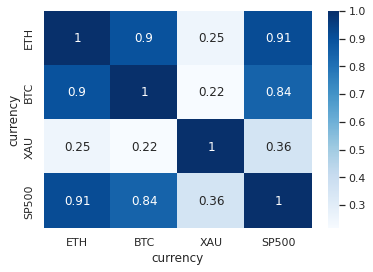

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')